<a href="https://colab.research.google.com/github/Priyal-Dargan/NLP-Sentiment-Analysis-using-ML/blob/main/PYML_PROJECT_ANVESHAN_FOUNDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PROJECT TOPIC**
### ***A Hybrid NLP Framework for Detecting Depression and Anxiety on Social Platforms***



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **DATATSET**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('/content/Filtered data.csv', encoding='latin-1', engine='python')

# Encode target labels - Fit on all unique categories before splitting
label_enc = LabelEncoder()
data['label_encoded'] = label_enc.fit_transform(data['Category'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    data['Statement'],
    data['label_encoded'],
    test_size=0.2,
    random_state=42
)

### **PREPROCESSING**

In [ ]:
data.describe()

,label_encoded
count,19294.000000
mean,0.798746
std,0.401465
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19294 entries, 0 to 19293
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S.No.          19292 non-null  object
 1   Statement      19283 non-null  object
 2   Category       19290 non-null  object
 3   label_encoded  19294 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 603.1+ KB


In [ ]:
data.shape

(19294, 4)

In [ ]:
data.isnull().sum()

,0
S.No.,2
Statement,11
Category,4
label_encoded,0


In [ ]:
data.dropna(inplace=True)


In [ ]:
data.isnull().sum()

,0
S.No.,0
Statement,0
Category,0
label_encoded,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data['Category'].value_counts()

,count
Category,
Depression,15402
Anxiety,3880


In [ ]:
#REMOVING MISSPELLED COLUMN
# data['Category'] = data['Category'].replace('status', 'Stress') # This line is not needed based on value counts.

In [ ]:
data['Category'].value_counts()

,count
Category,
Depression,15402
Anxiety,3880


In [ ]:
data['Statement'] = data['Statement'].str.lower()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data.columns

Index(['S.No.', 'Statement', 'Category', 'label_encoded'], dtype='object')

In [ ]:
data['Category'].value_counts()

,count
Category,
Depression,15402
Anxiety,3880


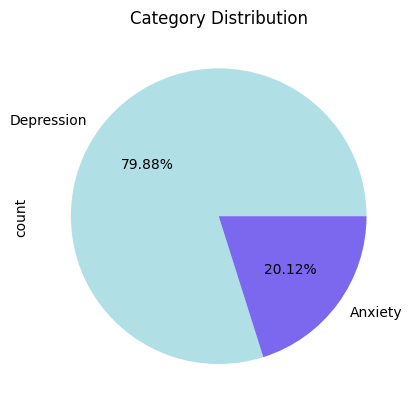

In [ ]:
#Pie chart
data['Category'].value_counts().plot(kind='pie', autopct='%.2f%%',colors=['powderblue', 'mediumslateblue', 'salmon', 'palegreen', 'lemonchiffon'])
plt.title('Category Distribution')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

model_scores = {}  # Store model name → accuracy

### **MODEL TRAINING**

In [ ]:
# Encode target labels
label_enc = LabelEncoder()
data['label_encoded'] = label_enc.fit_transform(data['Category'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    data['Statement'],
    data['label_encoded'],
    test_size=0.2,
    random_state=42
)

# TF-IDF vectorization for classical ML models
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


/tmp/ipython-input-4246907737.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette="viridis")


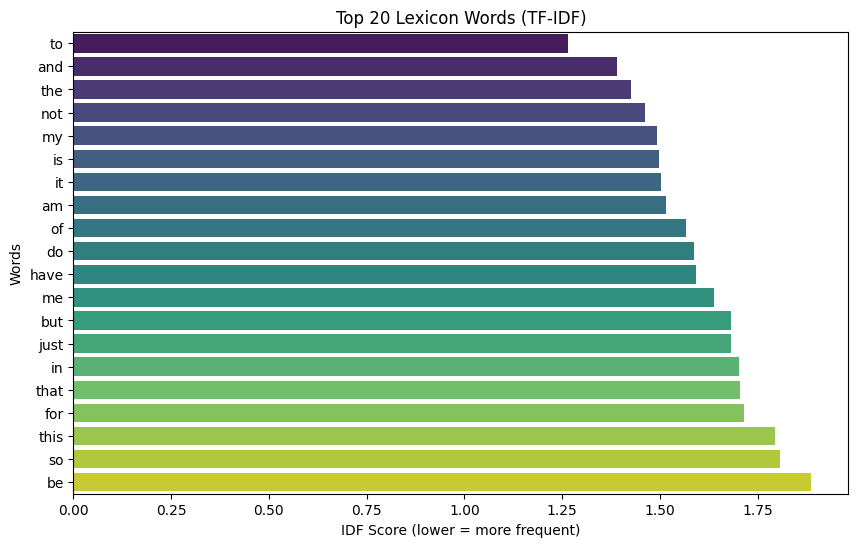

In [ ]:
# --- Lexicon Graph (Top TF-IDF Words) ---
import numpy as np

# Get words and their corresponding IDF scores
feature_names = np.array(tfidf.get_feature_names_out())
idf_scores = tfidf.idf_

# Sort words by importance (lower idf = more frequent across documents)
sorted_idx = np.argsort(idf_scores)

# Top 20 words (most informative by TF-IDF)
top_n = 20
top_words = feature_names[sorted_idx[:top_n]]
top_scores = idf_scores[sorted_idx[:top_n]]

plt.figure(figsize=(10,6))
sns.barplot(x=top_scores, y=top_words, palette="viridis")
plt.xlabel("IDF Score (lower = more frequent)")
plt.ylabel("Words")
plt.title(f"Top {top_n} Lexicon Words (TF-IDF)")
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


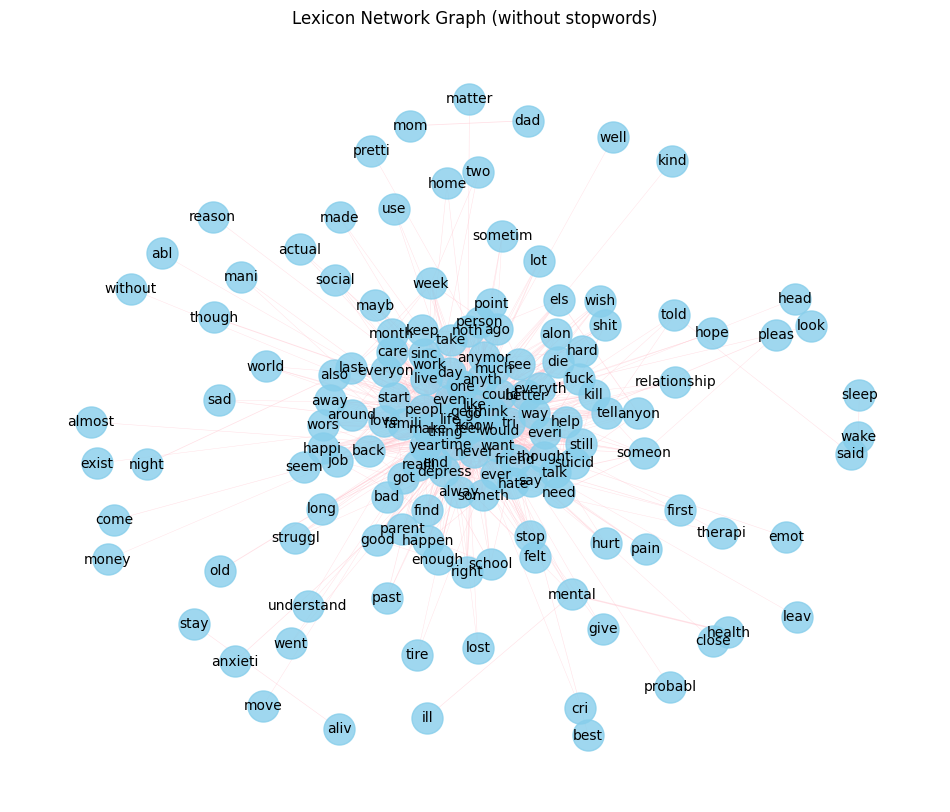

In [ ]:
import networkx as nx

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download resources if not already
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # for lemmatizer
nltk.download('punkt_tab') # Download the missing resource

# Initialize stemmer, lemmatizer, and stopwords
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Custom tokenizer: tokenization + stopword removal + stemming + lemmatization
def stem_lemma_tokenizer(text):
    tokens = word_tokenize(text.lower())  # lowercase + tokenize
    filtered = [t for t in tokens if t.isalpha() and t not in stop_words]  # remove stopwords & non-alphabetic

    # First lemmatize, then stem (you can swap if you want)
    processed = [stemmer.stem(lemmatizer.lemmatize(token)) for token in filtered]
    return processed

# Use custom tokenizer inside TF-IDF
tfidf = TfidfVectorizer(max_features=200, tokenizer=stem_lemma_tokenizer)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



# Get words
words = tfidf.get_feature_names_out()

# Compute word similarity matrix (cosine similarity between words)
from sklearn.metrics.pairwise import cosine_similarity
word_sim_matrix = cosine_similarity(X_train_tfidf.T)

# Build graph
G = nx.Graph()
for i in range(len(words)):
    for j in range(i+1, len(words)):
        if word_sim_matrix[i, j] > 0.15:  # threshold for edge strength
            G.add_edge(words[i], words[j], weight=word_sim_matrix[i, j])

# Draw graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.3)  # layout for visualization
edges = G.edges(data=True)

# Edge weights
weights = [edata['weight']*2 for _,_,edata in edges]

nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue", alpha=0.8)
nx.draw_networkx_edges(G, pos, width=weights, edge_color="pink", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

plt.title("Lexicon Network Graph (without stopwords)")
plt.axis("off")
plt.show()

In [ ]:
data.sample(5)

,S.No.,Statement,Category,label_encoded
1709,1710,tintin,Anxiety,0
11064,11062,i do not know why i am typing this i just have...,Depression,1
2386,2387,bismillah jewelllll. â¢â¯ â¢â¯. â¢â¯ â¢â¯....,Anxiety,0
13571,13569,"so where to start, i am currently 18 made 3 at...",Depression,1
3519,3520,life does not tolerate the weak... adolf hitler,Anxiety,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []   # to store metrics for final table
model_scores = {}  # to store only accuracy for plotting

for name, model in models.items():
    # Train
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)

    # Metrics
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted')
    rec = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    # Save
    model_scores[name] = acc
    results.append([name, acc, prec, rec, f1])

    # Print nicely
    print(f"\n{name}")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1 Score : {f1:.4f}")

# Convert to DataFrame for final table
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\nOverall Comparison:")
print(df_results)


Logistic Regression
  Accuracy : 0.9367
  Precision: 0.9375
  Recall   : 0.9367
  F1 Score : 0.9371

Random Forest
  Accuracy : 0.9328
  Precision: 0.9330
  Recall   : 0.9328
  F1 Score : 0.9329

SVM
  Accuracy : 0.9398
  Precision: 0.9423
  Recall   : 0.9398
  F1 Score : 0.9407

KNN
  Accuracy : 0.5592
  Precision: 0.8326
  Recall   : 0.5592
  F1 Score : 0.5947

Overall Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.936738   0.937491  0.936738  0.937071
1        Random Forest  0.932849   0.933017  0.932849  0.932931
2                  SVM  0.939850   0.942337  0.939850  0.940736
3                  KNN  0.559243   0.832632  0.559243  0.594736


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tokenize
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

# LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=128, input_length=100),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_enc.classes_), activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train_seq, y_train, epochs=3, batch_size=32, validation_split=0.1)

# Generate predictions
y_pred_probs = model_lstm.predict(X_test_seq)
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()

# Metrics for LSTM
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("LSTM")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1 Score : {f1:.4f}")

# Save results consistently
model_scores["LSTM"] = acc   # only accuracy for plotting
results.append(["LSTM", acc, prec, rec, f1])  # full metrics for comparison table


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
434/434 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9277 - loss: 0.2033 - val_accuracy: 0.9728 - val_loss: 0.0767
Epoch 2/3
434/434 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9795 - loss: 0.0589 - val_accuracy: 0.9695 - val_loss: 0.0851
Epoch 3/3
434/434 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9868 - loss: 0.0420 - val_accuracy: 0.9644 - val_loss: 0.0866
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
LSTM
  Accuracy : 0.9645
  Precision: 0.9650
  Recall   : 0.9645
  F1 Score : 0.9647


In [ ]:
import numpy as np
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertModel

tokenizer_bert = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased', from_pt=True)

def get_bert_embeddings(texts, batch_size=32):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        encodings = tokenizer_bert(
            batch_texts.tolist(),
            padding=True,
            truncation=True,
            max_length=64,
            return_tensors='tf'
        )
        outputs = bert_model(encodings)
        # CLS token representation
        embeddings = outputs.last_hidden_state[:, 0, :]
        all_embeddings.append(embeddings.numpy())
    return np.vstack(all_embeddings)



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the mode

In [ ]:
# takes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming your dataframe is called df with columns 'Statement' and 'Category'
X = data['Statement']
y = data['Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


### **EVALUATION**

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

stacking_model = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=500)),
        ('rf', RandomForestClassifier(n_estimators=100, n_jobs=-1)),
        ('svc', LinearSVC())
    ],
    final_estimator=LogisticRegression(max_iter=500),
    n_jobs=-1
)

stacking_model.fit(X_train_tfidf, y_train)
stack_preds = stacking_model.predict(X_test_tfidf)
acc = accuracy_score(y_test, stack_preds)
model_scores["Stacking Ensemble"] = acc
print("Stacking Ensemble Accuracy:", acc)


Stacking Ensemble Accuracy: 0.9655172413793104


In [ ]:
!pip install lime
from lime.lime_text import LimeTextExplainer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

explainer = LimeTextExplainer(class_names=label_enc.classes_)

i = 0  # index of test sample

# Create a new TF-IDF vectorizer and fit on the training data with 5000 features
tfidf_explainer = TfidfVectorizer(max_features=5000)
tfidf_explainer.fit(X_train)

# Create a new Logistic Regression model and train it on the training data vectorized with 5000 features
lr_explainer = LogisticRegression(max_iter=1000)
lr_explainer.fit(tfidf_explainer.transform(X_train), y_train)


exp = explainer.explain_instance(
    X_test.iloc[i],
    classifier_fn=lambda x: lr_explainer.predict_proba(tfidf_explainer.transform(x))
)
exp.show_in_notebook()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=53325777a8a9092e1d2e84d76989058e42716ae373b9f93f368e5f374a536cc9
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

results = []  # To store all model results

# DistilBERT embeddings (batch processed)
X_train_bert = get_bert_embeddings(X_train, batch_size=16)
X_test_bert  = get_bert_embeddings(X_test, batch_size=16)

# Example: Logistic Regression on BERT embeddings
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_bert, y_train)
y_pred_lr = lr.predict(X_test_bert)

# Metrics for DistilBERT + Logistic Regression
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr, average='weighted')
rec = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

print("DistilBERT + Logistic Regression")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Save results consistently
model_scores["DistilBERT + LR"] = acc   # only accuracy for plotting
results.append(["DistilBERT + Logistic Regression", acc, prec, rec, f1])  # full metrics for table


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


DistilBERT + Logistic Regression
Accuracy : 0.9666
Precision: 0.9670
Recall   : 0.9666
F1 Score : 0.9667
Confusion Matrix:
 [[ 716   53]
 [  76 3012]]


### **RESULTS**


Overall Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.963702   0.964624  0.963702  0.964028
1        Random Forest  0.949702   0.950137  0.949702  0.949895
2                  SVM  0.967851   0.969342  0.967851  0.968282
3                  KNN  0.291159   0.833233  0.291159  0.238006


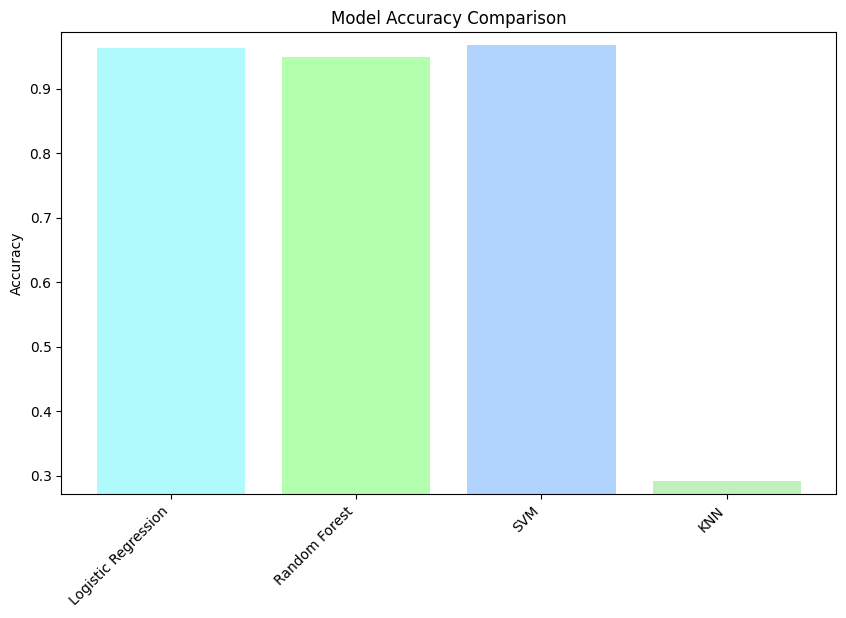

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

results = []        # all metrics for final table
model_scores = {}   # only accuracy for plotting

# --- Classical Models Evaluation ---
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)

    # Metrics
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted')
    rec = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    # Save for table + plotting
    results.append([name, acc, prec, rec, f1])
    model_scores[name] = acc

# --- Add LSTM and DistilBERT results if you already computed them ---
# results.append(["LSTM", lstm_acc, lstm_prec, lstm_rec, lstm_f1])
# results.append(["DistilBERT + LR", bert_acc, bert_prec, bert_rec, bert_f1])
# model_scores["LSTM"] = lstm_acc
# model_scores["DistilBERT + LR"] = bert_acc

# --- Final Results Table ---
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\nOverall Model Comparison:")
print(df_results)

# --- Final Comparison Plot with Pastel Colors ---
plt.figure(figsize=(10, 6))

# Custom pastel palette
colors = ["#B0FAFD", "#B4FFAD", "#B0D4FD", "#C0F0BC", "#A09BFD", "#9DFBDC"]

# Plot bars (order preserved)
bar_colors = [colors[i % len(colors)] for i in range(len(model_scores))]
plt.bar(model_scores.keys(), model_scores.values(), color=bar_colors)

plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')

# Zoom in so differences are visible
min_acc = min(model_scores.values())
max_acc = max(model_scores.values())
plt.ylim(min_acc - 0.02, max_acc + 0.02)

plt.show()


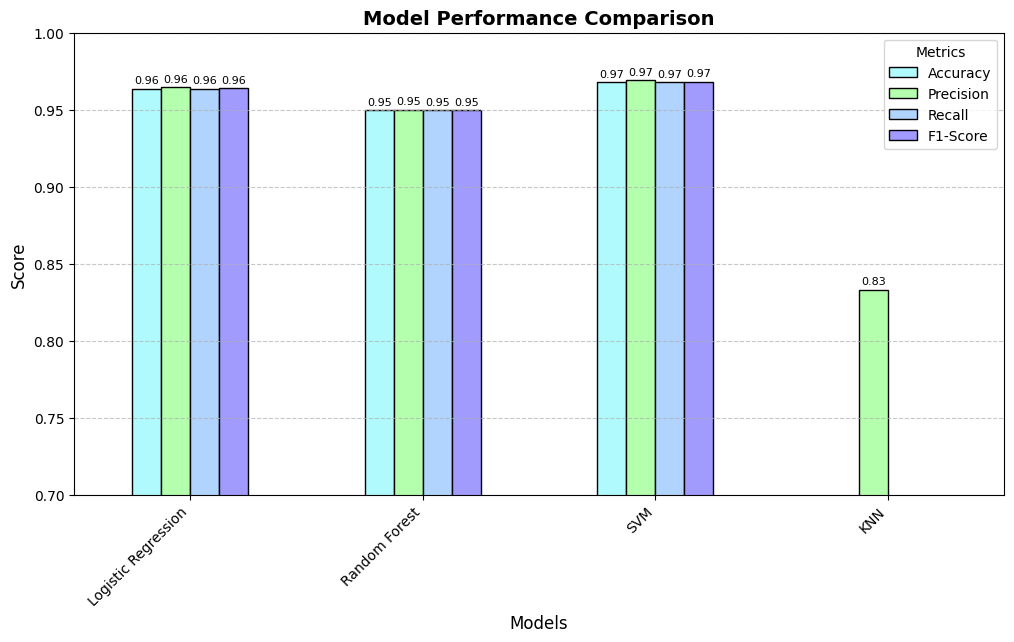

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert results into DataFrame (from model_scores dict)
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
df_results = df_results.set_index("Model")

# Plot grouped bars
ax = df_results.plot(kind="bar", figsize=(12, 6),
                     color=["#B0FAFD", "#B4FFAD", "#B0D4FD", "#A09BFD"],
                     edgecolor="black")

plt.title("Model Performance Comparison", fontsize=14, weight="bold")
plt.ylabel("Score", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 1.0)  # adjust depending on your results

# Add legend
plt.legend(title="Metrics", fontsize=10)

# Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# ---- Add value labels on top of bars ----
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=8, padding=2)

plt.show()

In [ ]:

# Create DataFrame from results list
df_results1 = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# Print table nicely
print("\nOverall Model Comparison:")
print(df_results1.to_string(index=False))



Overall Model Comparison:
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.963702   0.964624 0.963702  0.964028
      Random Forest  0.949702   0.950137 0.949702  0.949895
                SVM  0.967851   0.969342 0.967851  0.968282
                KNN  0.291159   0.833233 0.291159  0.238006


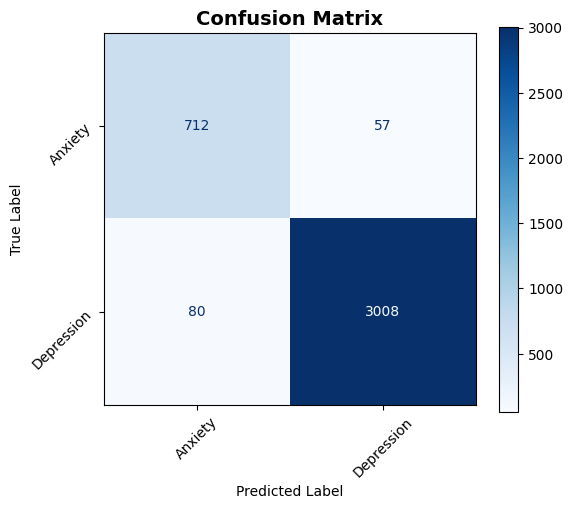

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
# Convert numerical predictions back to original string labels
y_pred_labels = label_enc.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred_labels)

# Display the confusion matrix using sklearn helper
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_enc.classes_)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap="Blues", colorbar=True)

plt.title("Confusion Matrix", fontsize=14, weight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

_______________________________________________

**Explanation of the code:**

1.  **Import Libraries:** Import necessary libraries, including `shap`, `torch`, and components from `transformers`.
2.  **Load Model and Tokenizer:** Load the DistilBERT tokenizer and the `DistilBertForSequenceClassification` model from Hugging Face, ensuring you specify the number of labels (`num_labels`) based on your dataset. The model is set to evaluation mode (`model.eval()`).
3.  **Label Encoding:** Re-initialize and fit a `LabelEncoder` on all unique categories from your original data (`data['Category'].unique()`) to ensure it can handle all possible output classes. Then, transform your test sample labels.
4.  **`predict_proba_torch` Function:** Define a function that takes a list of text strings as input, tokenizes them using the DistilBERT tokenizer, passes them through the PyTorch model, and returns the predicted probabilities for each class using `softmax`. This function is designed to be compatible with SHAP's explainers.
5.  **Select Subset:** Choose a small subset of your test data (`X_test_sample_subset`) for explainability, as SHAP calculations can be computationally intensive, especially with larger datasets or models.
6.  **Create SHAP Explainer:** Initialize a `shap.KernelExplainer`. This explainer works by approximating SHAP values and can be used with any model as long as you provide a prediction function (`predict_proba_torch`) and a background dataset (the subset of test data in this case).
7.  **Choose Instance and Calculate SHAP Values:** Select a specific text instance from the subset that you want to explain. Calculate the SHAP values for this instance using the explainer.
8.  **Visualize Explanation:** Use `shap.initjs()` to enable JavaScript visualizations in the notebook and `shap.force_plot()` to visualize the explanation for the chosen instance. The `force_plot` shows how each word in the input contributes to the model's prediction for a specific class. We also map the predicted label back to its original category name for clarity.